In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [69]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

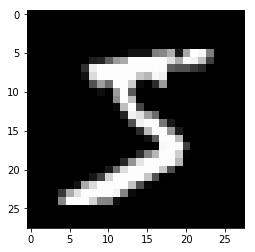

In [70]:
tmp = x_train[0]
pix = tmp.reshape((28,28))
plt.imshow(pix,cmap='gray')

In [71]:
print(len(x_train))
print(len(x_test))

60000
10000


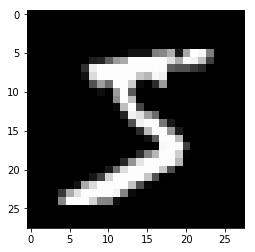

In [72]:
tmp2 = x_train[0]/255
pix2 = tmp2.reshape((28,28))
plt.imshow(pix2,cmap='gray')

In [73]:
x_train = x_train/255.0
x_test = x_test / 255.0

In [74]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [141]:
def trainModel():

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28)))
    #model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu'))
    #model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu'))
    model.add(tf.keras.layers.Reshape(target_shape=(28, 28, 1)))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(4, 4)))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4, 4)))
    model.add(tf.keras.layers.MaxPooling2D((4, 4)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    '''
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                     activation='relu'),
      tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                     activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    '''
    model.build()
    model.compile(optimizer='SGD',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])
    
    model.fit(
        x_train,
        y_train,
        epochs=3,
        validation_data=(x_test, y_test),
    )
    return model

In [142]:
model = trainModel()

Epoch 1/3
   7/1875 [..............................] - ETA: 18s - loss: 2.2694 - accuracy: 0.1562 

2022-12-05 23:26:00.087150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.3941 - accuracy: 0.8828

2022-12-05 23:26:16.156280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 9ms/step - loss: 0.3941 - accuracy: 0.8828 - val_loss: 0.1269 - val_accuracy: 0.9621
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1124 - accuracy: 0.9663 - val_loss: 0.0777 - val_accuracy: 0.9756
Epoch 3/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0800 - accuracy: 0.9756 - val_loss: 0.0626 - val_accuracy: 0.9807


Let's Pull a random test and see the result!

In [77]:
import numpy as np

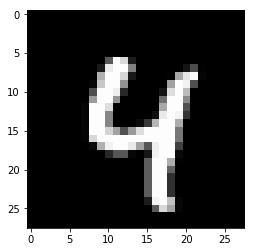

In [78]:
randomSample = x_test[np.random.randint(0, x_test.shape[0]), ...]
plt.imshow(randomSample,cmap='gray')

In [79]:
randomSample = randomSample.reshape((1,28,28))

In [80]:
prediction = model.predict(randomSample)

1/1 [==============================] - 0s 58ms/step


2022-12-05 23:08:59.203199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [81]:
print(prediction)
np.argmax(prediction)

[[7.3780960e-08 8.6281080e-09 1.1087664e-07 2.0259408e-08 9.9969780e-01
  1.6076835e-07 1.2135465e-07 1.5086209e-05 4.9502319e-06 2.8171547e-04]]


4

# Adverserial Learning Below:

##### Now we want to manipulate the image to think that it's some other image
To do this, instead of optimising a parameter aka minimising the oss function we do the quite opposite; essentially we're 'training' the image to match the desired result given a model

Explain what a gradient is:

In [82]:
def getGradients(target, inputVal):
    #https://www.tensorflow.org/api_docs/python/tf/convert_to_tensor
    tensor = tf.convert_to_tensor(inputVal)
    with tf.GradientTape() as g:
        g.watch(tensor)
        output = model(tensor)
    gradients = g.batch_jacobian(output,tensor)
    return np.squeeze(gradients.numpy()[:, target, ...])
    

In [83]:
predictedVal = np.argmax(prediction)

In [85]:
getGradients(4,randomSample)

2022-12-05 23:09:11.159051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[-3.46395791e-06, -5.15048123e-06, -6.35560491e-06,
        -6.87292550e-06,  2.68896883e-06,  7.46717433e-06,
         9.41861799e-06,  1.13742526e-05,  6.92041158e-06,
        -2.74561285e-06, -8.30945464e-06, -4.79325399e-06,
         9.61282240e-07,  2.71939507e-06,  5.57827707e-06,
         4.51331061e-06,  8.17117234e-06,  1.83257362e-05,
         1.12979224e-05,  1.19541119e-05, -4.81621737e-06,
        -1.16463052e-05, -4.33036030e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-7.95707183e-06, -1.97073496e-05, -2.15358777e-05,
        -1.29524651e-05,  5.58773263e-06,  1.83316224e-05,
         1.61027510e-05,  6.70984537e-06, -1.05171885e-05,
        -3.32920572e-05, -3.59264195e-05, -1.98618491e-05,
        -2.07066241e-05, -1.90018618e-05, -1.93022552e-05,
        -2.20669117e-05,  5.57430269e-07,  9.72799353e-06,
         1.12732268e-05,  1.45281274e-05,  5.75859758e-06,
         5.97547387e-06,  2.96

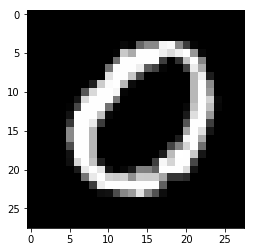

In [179]:
randomSample = x_test[np.random.randint(0, x_test.shape[0]), ...]
plt.imshow(randomSample,cmap='gray')

In [180]:
randomSample = randomSample.reshape((1,28,28))
currentPrediction = model.predict(randomSample)
valOfCurrentPrediction = np.argmax(currentPrediction)
print(valOfCurrentPrediction)

1/1 [==============================] - 0s 18ms/step
0


In [181]:

def unlearn(img):    
    target = 3
    while True:
        gradients = getGradients(target,img)
        img = img + (0.02 * gradients / np.max(gradients))

        newPrediction = model.predict(img)
        print("now predict "+str(np.argmax(newPrediction)) +" with pr "+str(np.max(newPrediction)))
        '''
        if np.argmax(newPrediction) != valOfCurrentPrediction:
            break
        '''
        if np.argmax(newPrediction) == target:
            return img

In [182]:
img = randomSample
img = unlearn(img)

1/1 [==============================] - 0s 9ms/step


2022-12-05 23:34:09.728924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9997197
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:09.961350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.99963427
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:10.212133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.99952567
1/1 [==============================] - 0s 9ms/step


2022-12-05 23:34:10.540144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9993827
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:10.764639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.99919266
1/1 [==============================] - 0s 9ms/step


2022-12-05 23:34:11.013699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.99892676
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:11.258944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9985719
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:11.506199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9980629
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:11.737482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9974329
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:12.060605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.99667656
1/1 [==============================] - 0s 11ms/step


2022-12-05 23:34:12.313809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9956121
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:12.570172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9943395
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:12.829616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9927214
1/1 [==============================] - 0s 11ms/step


2022-12-05 23:34:13.075655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.99060994
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:13.382898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9878079
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:13.653588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9840937
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:13.908931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.979126
1/1 [==============================] - 0s 11ms/step


2022-12-05 23:34:14.148803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9722549
1/1 [==============================] - 0s 11ms/step


2022-12-05 23:34:14.385021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.962868
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:14.722486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9499592
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:14.963237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9320634
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:15.204169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.9073612
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:15.432488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.8735144
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:15.676003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.8271712
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:16.013555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.7656906
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:16.254212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.6902839
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:16.502806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.5967439
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:16.764073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.48939118
1/1 [==============================] - 0s 9ms/step


2022-12-05 23:34:17.015579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 0 with pr 0.37765434
1/1 [==============================] - 0s 10ms/step


2022-12-05 23:34:17.344039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


now predict 5 with pr 0.30834746
1/1 [==============================] - 0s 10ms/step
now predict 3 with pr 0.42763963


2022-12-05 23:34:17.602861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [183]:
img = img.reshape((28,28))

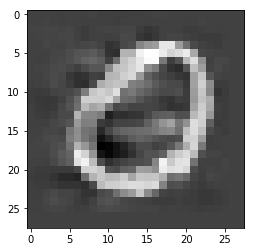

In [184]:
plt.imshow(img,cmap='gray')